<a href="https://colab.research.google.com/github/I-gW-23-27/Skript/blob/main/docs/230919/Bahnhofsuhr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SBB Bahnhofsuhr

Hans Hilfiker (* 15. September 1901 in Zürich; † 2. März 1993 in
Gordevio TI) war ein Schweizer Elektroingenieur und Gestalter.

Sein bekanntestes Werk ist die Schweizer Bahnhofsuhr. Diese 1944
gestaltete Uhr ergänzte er später mit dem von ihm entwickelten
Sekundenzeiger mit der charakteristischen roten Kelle. Hilfiker sah sich
erst ab den 1940er Jahren als Designer und hat seine
Gestaltungsphilosophie als Ingenieur ohne Anlehnung aus der Kunst
eigenständig entwickelt. Er gilt als einer der Pioniere des
schweizerischen Industriedesigns.

([Text gemäss Wikipedia](https://de.wikipedia.org/wiki/Hans_Hilfiker))

![Prportionen SBB-Bahnhofsuhr](https://github.com/I-gW-23-27/Skript/blob/main/docs/images/dimensionen_bahnhofsuhr.jpg?raw=1)
([Bildquelle](https://www.eguide.ch/en/objekt/sbb-bahnhofsuhr/))

## Zeichnen einer Schweizer Bahnhofsuhr

Python und PyTamaro stellen alle erforderlichen Werkzeuge zum Zeichnen
einer Schweizer Bahnhofsuhr zur Verfügung. Im Verlauf dieses Notebooks
wird diese Schritt für Schritt gezeichnet.

Mit der folgenden Zelle wird zuerst PyTamaro für Google Colaboratory
installiert. Diese Zelle ist nur auszuführen, wenn das Jupyter Notebook
in
[Google
Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb)
ausgeführt wird.

In [1]:
! pip install pytamaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 25.0 MB/s eta 0:00:00


### Import von PyTamaro

Die nächste Zelle importiert die erforderlichen Methoden aus PyTamaro.

In [2]:
from pytamaro.de import (Grafik, ellipse, rechteck, leere_grafik,
                         rot, schwarz, weiss, transparent, rgb_farbe,
                         ueber, ueberlagere, neben, fixiere, kombiniere, drehe,
                         unten_mitte, oben_mitte,
                         zeige_grafik)

### Zeichnen des Zifferblatts

Als Aufwärmrunde wird das leere Zifferblatt (ohne Striche und ohne
Zeiger) gezeichnet.

Die Farbe für den Rand des Zifferblattes erhalten Sie als `rgb_farbe`.
Der Nenndurchmesser wird als Konstante definiert. Konstanten sind in
Python technisch nichts anderes als Variabeln. Damit Konstanten trotzdem
als sloche erkennbar sind, gilt die Konvention, dass deren `NAMEN` mit
Grossbuchstaben geschrieben werden.

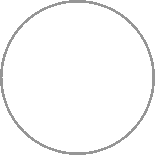

In [9]:
# Konstanten und Farben
NENNDURCHMESSER = 150
# für a wird wegen der Darstellung in der Zeichnung von der Konvention abgewichen
a = NENNDURCHMESSER / 100
RANDFARBE = rgb_farbe(150, 150, 150)

def zifferblatt_hintergrund(nenndurchmesser : float) -> Grafik:
    zifferblatt_weiss = ellipse(nenndurchmesser, nenndurchmesser, weiss)
    rand = ellipse(nenndurchmesser + 5, nenndurchmesser + 5, RANDFARBE)
    background = ueberlagere(zifferblatt_weiss, rand)

    return background

zeige_grafik(zifferblatt_hintergrund(NENNDURCHMESSER))

### Zeichnen der Stunden

Im nächsten Schritt werden die Striche für die Stunden gezeichnet. Dazu
wird als Vorbereitung ein einzelner Stundenstrich und dann die Stunden
12, 1 und 2 gezeichnet. Aus diesen drei Stunden kann dann die Anleitung für
die Wiederholung hergeleitet werden.

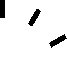

In [4]:
stundenstrich = rechteck(3.5 * a, 12 * a, schwarz)
abstand_stundenstrich = rechteck(3.5 * a, 36.5 * a, transparent)
stundenmodul = fixiere(unten_mitte, ueber(stundenstrich, abstand_stundenstrich))

zwoelf = stundenmodul
eins = drehe(-30, stundenmodul)
zwei = drehe(-60, stundenmodul)

stunden = kombiniere(zwoelf, eins)
stunden = kombiniere(stunden, zwei)

zeige_grafik(stunden)

Diese Vorbereitung zeigt, dass man die einzelnen "Stundenmodule"
mehrfach braucht und diese mehrfach durch die Funktion `kombiniere()`
miteinander verbindet.

Wünschenswert ist enstprechend eine Funktion `get_hour()`, welcher die
gewünschte Stunde als Parameter übergeben wird.

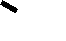

In [5]:
def get_hour(time : int) -> Grafik:
    # TODO: schreiben Sie hier den Code, der ein Stundenmodul im der
    # Zeit entsprechenden Winkel zurückgibt
    angle = 360 / 12 * time
    stundenstrich = rechteck(3.5 * a, 12 * a, schwarz)
    abstand_stundenstrich = rechteck(3.5 * a, 36.5 * a, transparent)
    stundenmodul = fixiere(unten_mitte, ueber(stundenstrich, abstand_stundenstrich))

    return drehe(-angle, stundenmodul)

zeige_grafik(get_hour(10))

Mit der Funktion `get_hour()` steht das Werkzeug, das wiederholt werden
muss zur Verfügung. Die Bahnhofsuhr zeigt zwölf Stundenstriche. Also
brauchen wir eine zwölffache Repetition. Dafür stellt Python die
`for`-Schleife zur Verfügung. Der Code einer `for`-Schleife sieht
folgendermassen aus:

```Python
for zählvariabel in range(startwert, endwert, schrittgrösse):
    zu wiederholende Anweisung(en)
```

Dabei wird die `zählvariabel` vom `startwert` bis vor den `endwert`
unter Einhaltung der `schrittgrösse` hochgezählt. Beim `startwert` und
der `schrittgrösse` handelt es sich um optionale Parameter. Das heisst,
wenn die weggelassen werden, nehmen sie einen vordefinierten Wert an.
Der vordefinierte Wert für `startwert` ist null, derjenige für
`schrittgrösse` ist 1.

Übertragen auf die zwölf Stundenstriche für das Zifferblatt führt das zu
folgender Lösung:

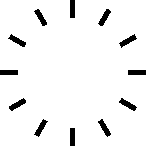

In [6]:
stunden = get_hour(12)

for time in range(12):
    stunden = kombiniere(stunden, get_hour(time))

zeige_grafik(stunden)

### Zeichnen der Minuten

Die auf die Stunden zutreffenden Überlegungen können ohne weiteres auf
die Minuten übertragen werden. In der folgenden Zelle geht es darum, die
für die Minutenstriche erforderliche Funktion zu programmieren und
deren Anwendung so oft zu wiederholen, dass die Minutenstriche für das
Zifferblatt gezeichnet werden.

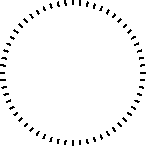

In [7]:
def get_minute(time):
    # TODO: schreiben Sie eine Minutenfunktion analog zur
    # Stundenfunktion
    angle = 360 / 60 * time
    minutenstrich = rechteck(1.4 * a, 3.5 * a, schwarz)
    abstand_minutenstrich = rechteck(1.4 * a, 45 * a, transparent)
    minutenmodul = fixiere(unten_mitte, ueber(minutenstrich, abstand_minutenstrich))

    return drehe(-angle, minutenmodul)

minuten = get_minute(60)

for time in range(60):
    minuten = kombiniere(minuten, get_minute(time))

zeige_grafik(minuten)


### Zifferblatt ohne Zeiger

Die bisherigen Arbeiten können nun so kombiniert werden, dass ein
Zifferblatt ohne Zeiger gezeichnet wird.

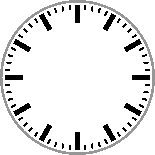

In [11]:
def get_dial(nenndurchmesser):
    # TODO: schreiben Sie eine Funktion, die aus den bisherigen
    # Vorarbeiten ein Zifferlbatt ohne Zeiger zeichnet
    hintergrund = zifferblatt_hintergrund(nenndurchmesser)

    stunden = get_hour(12)

    for time in range(12):
        stunden = kombiniere(stunden, get_hour(time))

    minuten = get_minute(60)

    for time in range(60):
        minuten = kombiniere(minuten, get_minute(time))

    dial = ueberlagere(minuten, stunden)
    dial = ueberlagere(dial, hintergrund)

    return dial

zeige_grafik(get_dial(NENNDURCHMESSER))


### Zeiger

In einem letzten Schritt schreiben Sie eine Funktion, mit der eine frei
gewählte Zeit dargestellt werden kann. Als Vereinfachung können Sie für
Stunden- und Minutenzeiger statt von einem Trapez von einem Rechteck mit
mittlerer Breite ausgehen.

Allfällige Hilfsfunktionen können sie oberhalb der Funktion
`show_time()` schreiben.

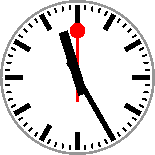

In [12]:
# Sekundenzeiger
def sekundenzeiger(nenndurchmesser : float, sekunde : int) -> Grafik:
    angle = 360 / 60 * sekunde

    zeigerkelle = ellipse(10.5 * a, 10.5 * a, rot)
    zeigerschaft = fixiere(oben_mitte, rechteck(1.4 * a, 31.2 * a, rot))
    zeiger_mit_kelle = fixiere(unten_mitte, kombiniere(zeigerkelle, zeigerschaft))
    zeigerende = fixiere(oben_mitte, rechteck(1.4 * a, 16.5 * a, rot))
    zeiger = kombiniere(zeiger_mit_kelle, zeigerende)

    return drehe(-angle, zeiger)

# Minutenzeiger
def minutenzeiger(nenndurchmesser : float, minute : int) -> Grafik:
    angle = 360 / 60 * minute

    zeiger_kurz = fixiere(oben_mitte, rechteck(3.6 * a, 12 * a, schwarz))
    zeiger_lang = fixiere(unten_mitte, rechteck(3.6 * a, 46 * a, schwarz))
    zeiger = kombiniere(zeiger_kurz, zeiger_lang)

    zeiger_mit_zeit = drehe(-angle, zeiger)

    return zeiger_mit_zeit

# Stundenzeiger
def stundenzeiger(nenndurchmeser : float, stunde : int, minute : int) -> Grafik:
    angle = 360 / (12*60) * (stunde*60 + minute)

    zeiger_kurz = fixiere(oben_mitte, rechteck(6.4 * a, 12 * a, schwarz))
    zeiger_lang = fixiere(unten_mitte, rechteck(6.4* a, 32 * a, schwarz))
    zeiger = kombiniere(zeiger_kurz, zeiger_lang)

    zeiger_mit_zeit = drehe(-angle, zeiger)

    return zeiger_mit_zeit

def show_time(nenndurchmesser, stunde, minute, sekunde):
    # TODO: schreiben Sie eine Funktion, welche eine beliebige Zeit
    # darstellen kann.
    # pass
    hintergrund = get_dial(nenndurchmesser)
    stunden_zeiger = stundenzeiger(nenndurchmesser, stunde, minute)
    minuten_zeiger = minutenzeiger(nenndurchmesser, minute)
    sekunden_zeiger = sekundenzeiger(nenndurchmesser, sekunde)

    zeit = kombiniere(sekunden_zeiger, minuten_zeiger)
    zeit = kombiniere(stunden_zeiger, zeit)
    zeit = kombiniere(zeit, hintergrund)

    return zeit

zeige_grafik(show_time(NENNDURCHMESSER, 11, 25, 0))


[Zurück zur Übersicht](https://i-gw-23-27.github.io/Skript/)